<a href="https://colab.research.google.com/github/Ana7334/Jogo-do-Amigo-Secreto/blob/main/C%C3%B3pia_de_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [ ]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


df_clean = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                      df_customer, df_phone, df_internet, df_account],
                     axis=1)

df_clean.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
print(df_clean['gender'].unique())

['Female' 'Male']


In [ ]:
df_clean.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(df_clean['Charges.Total'].unique())


['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
pd.to_numeric(df_clean['Charges.Total'], errors='coerce').isna().sum()


np.int64(11)

In [ ]:
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')
media = df_clean['Charges.Total'].mean()
df_clean['Charges.Total'] = df_clean['Charges.Total'].fillna(media)


In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
colunas_texto = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_texto:
    df_clean[col] = df_clean[col].str.strip().str.lower()


In [ ]:
df_clean['Contas_Diarias'] = (df_clean['Charges.Monthly'] / 30).round(2)


In [ ]:
df_clean[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [ ]:
binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binarias:
    df_clean[col] = df_clean[col].map({'yes': 1, 'no': 0})


In [ ]:
df_clean.rename(columns={
    'tenure': 'tempo_contrato',
    'Charges.Monthly': 'conta_mensal',
    'Charges.Total': 'conta_total',
    'Contas_Diarias': 'conta_diaria'
}, inplace=True)


In [ ]:
df_clean.describe()

,Churn,SeniorCitizen,Partner,Dependents,tempo_contrato,PhoneService,PaperlessBilling,conta_mensal,conta_total,conta_diaria
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157292
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2266.915104,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [ ]:
df_clean.describe(include='object')


,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,male,no,fiber optic,no,no,no,no,no,no,month-to-month,electronic check
freq,1,3675,3495,3198,3608,3182,3195,3582,2896,2870,4005,2445


In [ ]:
df_clean.describe(include='all')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tempo_contrato,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,conta_mensal,conta_total,conta_diaria
count,7267,7043.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,no,no,no,no,month-to-month,NaN,electronic check,NaN,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,2280.634213,2.157292
std,NaN,0.441561,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,2266.915104,1.004407
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,18.800000,0.610000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,401.400000,1.180000
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,1394.550000,2.340000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,3778.525000,2.995000


In [ ]:
df_clean.median(numeric_only=True)


,0
Churn,0.00
SeniorCitizen,0.00
Partner,0.00
Dependents,0.00
tempo_contrato,29.00
PhoneService,1.00
PaperlessBilling,1.00
conta_mensal,70.30
conta_total,1394.55
conta_diaria,2.34


In [ ]:
df_clean.std(numeric_only=True)


,0
Churn,0.441561
SeniorCitizen,0.369074
Partner,0.499782
Dependents,0.458343
tempo_contrato,24.571773
PhoneService,0.296371
PaperlessBilling,0.491265
conta_mensal,30.129572
conta_total,2266.915104
conta_diaria,1.004407


In [ ]:
print(df_clean.min(numeric_only=True))
print(df_clean.max(numeric_only=True))


Churn                0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tempo_contrato       0.00
PhoneService         0.00
PaperlessBilling     0.00
conta_mensal        18.25
conta_total         18.80
conta_diaria         0.61
dtype: float64
Churn                  1.00
SeniorCitizen          1.00
Partner                1.00
Dependents             1.00
tempo_contrato        72.00
PhoneService           1.00
PaperlessBilling       1.00
conta_mensal         118.75
conta_total         8684.80
conta_diaria           3.96
dtype: float64


In [ ]:
df_clean[df_clean['Churn'] == 1].describe()


,Churn,SeniorCitizen,Partner,Dependents,tempo_contrato,PhoneService,PaperlessBilling,conta_mensal,conta_total,conta_diaria
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094,2.481450
std,0.0,0.435799,0.479524,0.379576,19.531123,0.287626,0.433668,24.666053,1890.822994,0.822287
min,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,0.630000
25%,1.0,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,56.150000,134.500000,1.870000
50%,1.0,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,79.650000,703.550000,2.660000
75%,1.0,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.350000,8684.800000,3.940000


In [ ]:
df_clean[df_clean['Churn'] == 0].describe()


,Churn,SeniorCitizen,Partner,Dependents,tempo_contrato,PhoneService,PaperlessBilling,conta_mensal,conta_total,conta_diaria
count,5174.0,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.0,0.128721,0.528218,0.344801,37.569965,0.901044,0.535562,61.265124,2554.760104,2.042080
std,0.0,0.334923,0.499251,0.475349,24.113777,0.298632,0.498782,31.092648,2327.013364,1.036492
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.0,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,25.100000,579.575000,0.840000
50%,0.0,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,64.425000,1689.175000,2.150000
75%,0.0,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,88.400000,4262.850000,2.950000
max,0.0,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8672.450000,3.960000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

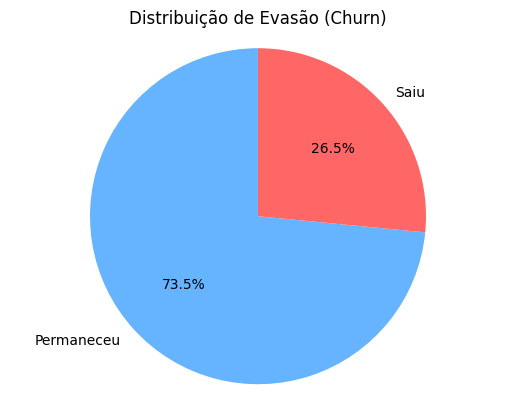

In [ ]:
#Calcular proporções
labels = ['Permaneceu', 'Saiu']
sizes = df_clean['Churn'].value_counts()
colors = ['#66b3ff', '#ff6666']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição de Evasão (Churn)')

plt.show()

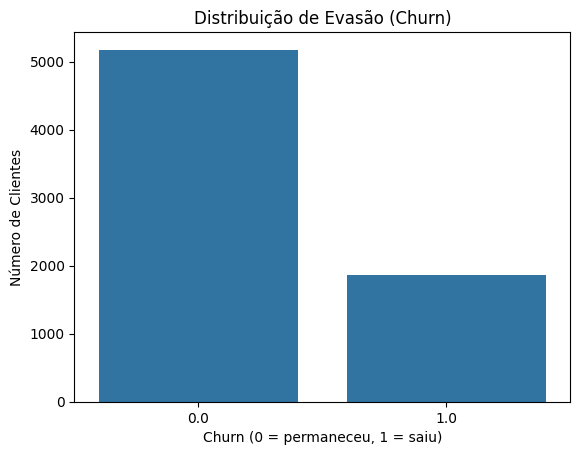

In [ ]:
sns.countplot(x='Churn', data=df_clean)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn (0 = permaneceu, 1 = saiu)')
plt.ylabel('Número de Clientes')

plt.show()


**Contagem de Evasão por Variáveis Categóricas**

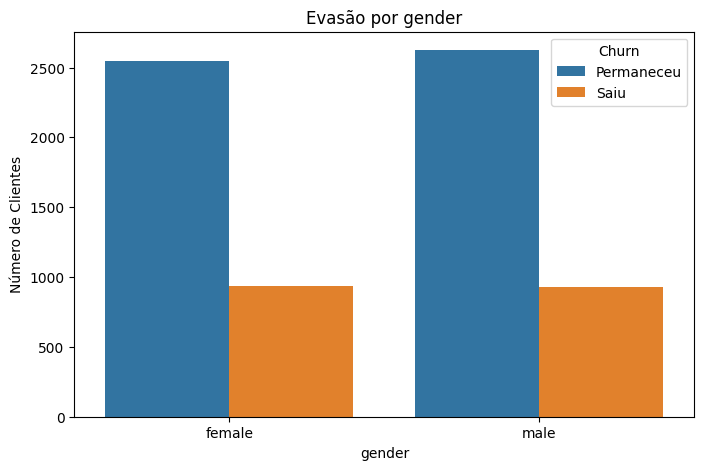

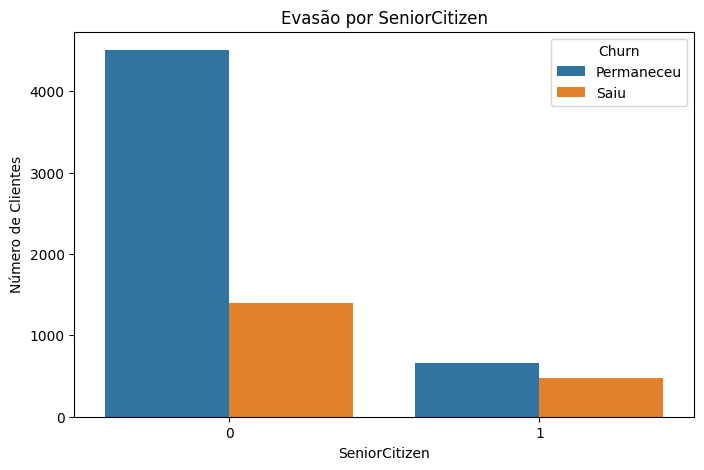

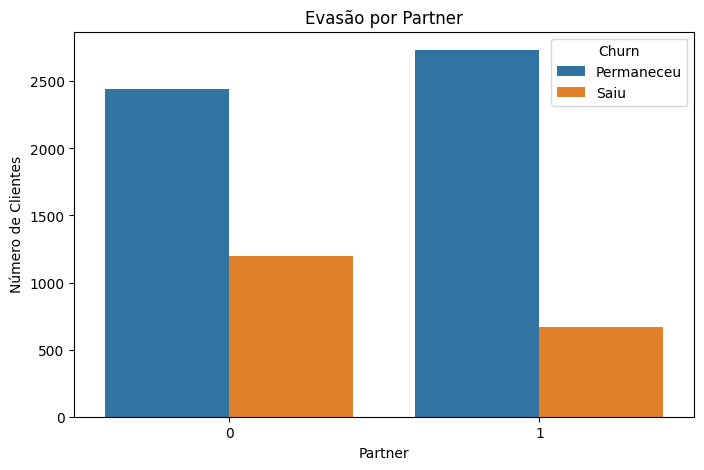

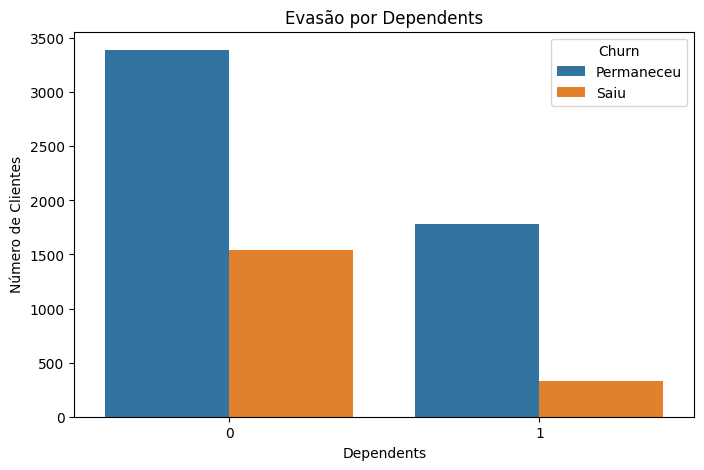

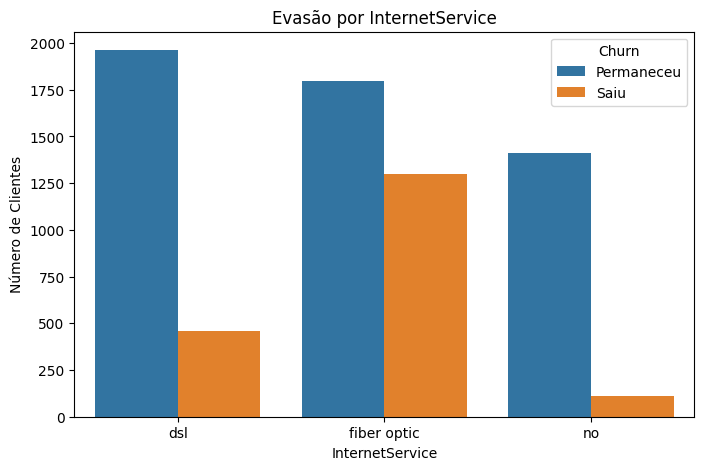

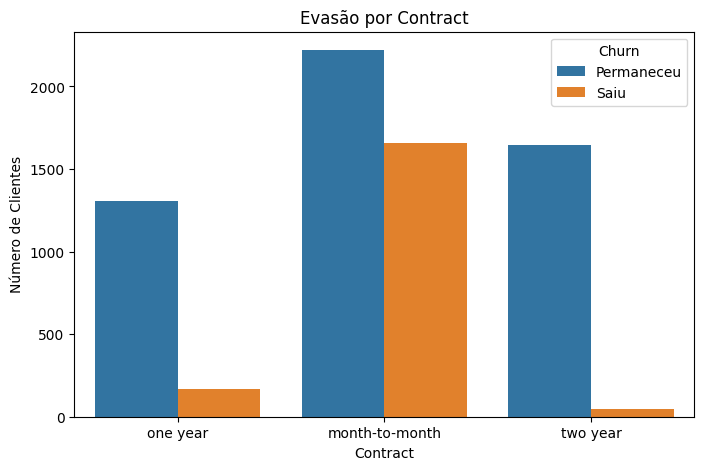

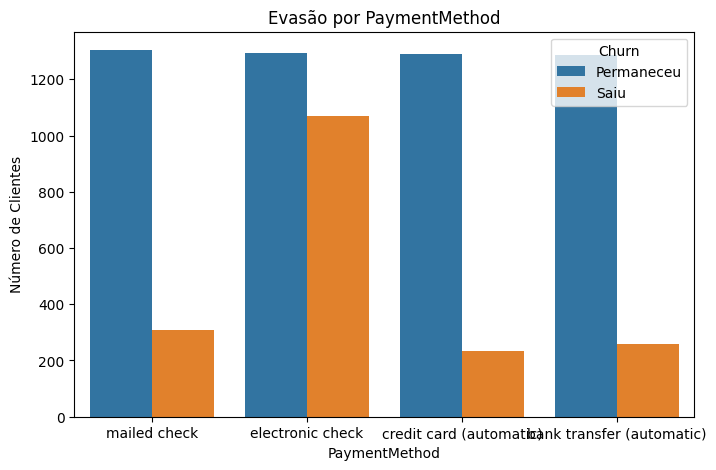

In [ ]:
def plot_churn_by_category(column):
    plt.figure(figsize=(8,5))
    sns.countplot(x=column, hue='Churn', data=df_clean)
    plt.title(f'Evasão por {column}')
    plt.xlabel(column)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
    plt.show()

plot_churn_by_category('gender')
plot_churn_by_category('SeniorCitizen')
plot_churn_by_category('Partner')
plot_churn_by_category('Dependents')
plot_churn_by_category('InternetService')
plot_churn_by_category('Contract')
plot_churn_by_category('PaymentMethod')


In [ ]:
df_clean.groupby('gender')['Churn'].mean()


,Churn
gender,
female,0.269209
male,0.261603


In [ ]:
df_clean.groupby('SeniorCitizen')['Churn'].mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [ ]:
df_clean.groupby('Partner')['Churn'].mean()


,Churn
Partner,
0,0.329580
1,0.196649


In [ ]:
df_clean.groupby('Dependents')['Churn'].mean()


,Churn
Dependents,
0,0.312791
1,0.154502


In [ ]:
df_clean.groupby('InternetService')['Churn'].mean()


,Churn
InternetService,
dsl,0.189591
fiber optic,0.418928
no,0.074050


In [ ]:
df_clean.groupby('Contract')['Churn'].mean()


,Churn
Contract,
month-to-month,0.427097
one year,0.112695
two year,0.028319


In [ ]:
df_clean.groupby('PaymentMethod')['Churn'].mean()


,Churn
PaymentMethod,
bank transfer (automatic),0.167098
credit card (automatic),0.152431
electronic check,0.452854
mailed check,0.191067


**1. Ver a média dessas variáveis por grupo de Churn:
Isso te mostra, por exemplo:**

- Clientes que cancelaram tinham menos tempo de contrato (tenure)?
- Mais (MonthlyCharges)?

In [ ]:
df_clean.groupby('Churn')[['tempo_contrato', 'conta_mensal', 'conta_total']].mean()


,tempo_contrato,conta_mensal,conta_total
Churn,,,
0.0,37.569965,61.265124,2554.760104
1.0,17.979133,74.441332,1531.796094


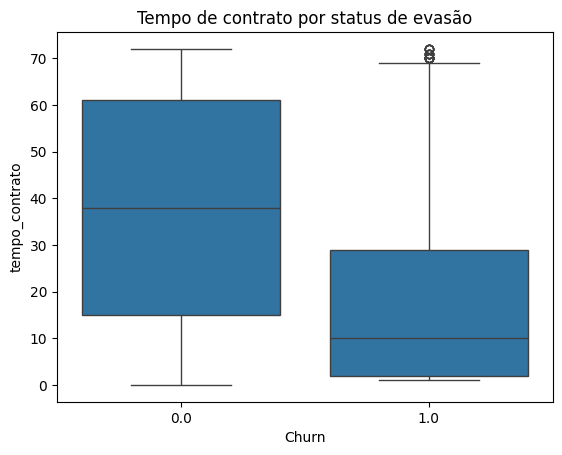

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_clean, x='Churn', y='tempo_contrato')
plt.title('Tempo de contrato por status de evasão')
plt.show()


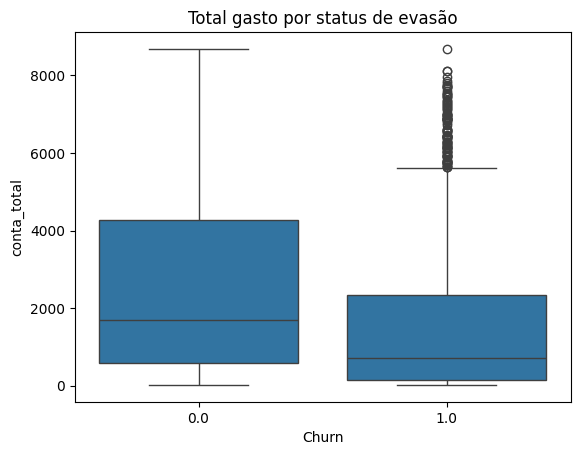

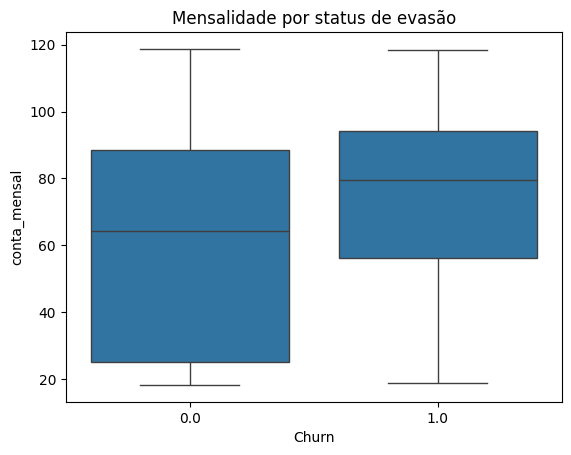

In [ ]:
sns.boxplot(data=df_clean, x='Churn', y='conta_total')
plt.title('Total gasto por status de evasão')
plt.show()

sns.boxplot(data=df_clean, x='Churn', y='conta_mensal')
plt.title('Mensalidade por status de evasão')
plt.show()


**Calcular correlação**

In [ ]:
# Seleciona só colunas numéricas para evitar erros no corr() lembrar
numerical_df = df_clean.select_dtypes(include=['number'])


**Calcular a matriz de correlação**

In [ ]:
corr_matrix = numerical_df.corr()




**Mostrar a correlação com 'Churn'**

In [ ]:
print(corr_matrix['Churn'].sort_values(ascending=False))


Churn               1.000000
conta_diaria        0.189918
conta_mensal        0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
PhoneService        0.012571
Partner            -0.148546
Dependents         -0.161384
conta_total        -0.194389
tempo_contrato     -0.344079
Name: Churn, dtype: float64


**Visualizar a matriz de correlação com heatmap**

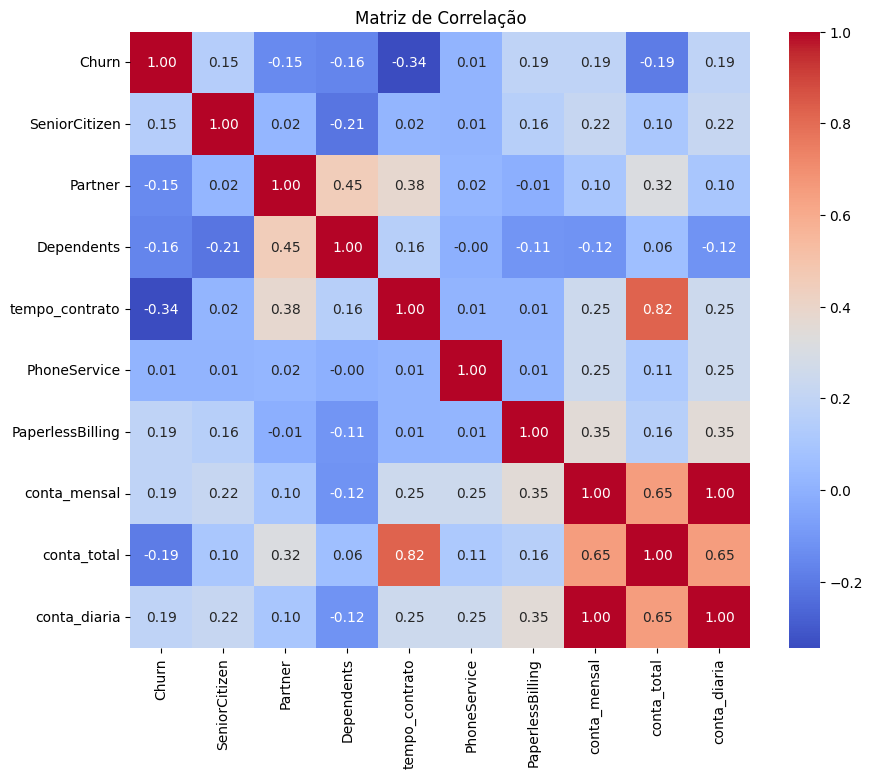

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


**Visualizar correlação específica com gráfico de dispersão (exemplo: conta_diaria x churn)**


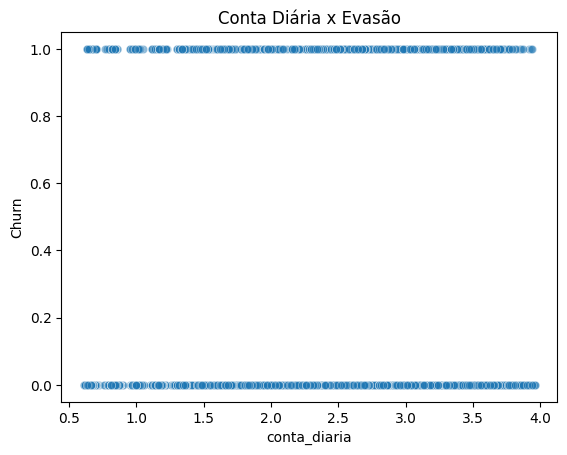

In [ ]:
sns.scatterplot(data=df_clean, x='conta_diaria', y='Churn', alpha=0.5)
plt.title('Conta Diária x Evasão')
plt.show()

**Criar uma variável com o número de serviços contratados**

In [ ]:
print(df_clean.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tempo_contrato', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'conta_mensal', 'conta_total', 'conta_diaria']


In [ ]:
servicos = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in servicos:
    print(f"{col}: {df_clean[col].unique()}")


PhoneService: [1 0]
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']


In [ ]:
# convertendo:  função para converter colunas de serviço para 0/1
def converter_servico(col):
    return col.map({
        'Yes': 1,
        'No': 0,
        'No internet service': 0,
        'No phone service': 0
    })

for col in servicos:
    df_clean[col] = converter_servico(df_clean[col])


In [ ]:
#Soma de Serviços
df_clean['num_servicos'] = df_clean[servicos].sum(axis=1)


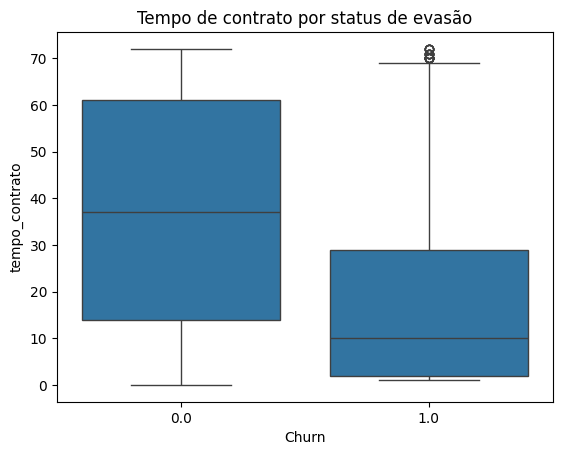

In [ ]:
import numpy as np

# Adicionar jitter no eixo y para melhor visualização
df_clean['Churn_jitter'] = df_clean['Churn'] + np.random.uniform(-0.05, 0.05, size=len(df_clean))


sns.boxplot(data=df_clean, x='Churn', y='tempo_contrato')
plt.title('Tempo de contrato por status de evasão')
plt.show()



#📄**Relatorio Final**


# Relatório de Análise de Evasão de Clientes (Churn)

## 1. Introdução

O objetivo dessa análise foi entender por que alguns clientes cancelam o serviço da empresa — o famoso churn. Saber quais características e comportamentos influenciam esse cancelamento ajuda a empresa a criar estratégias para segurar esses clientes e evitar perdas.

## 2. Limpeza e Tratamento dos Dados

Comecei verificando os dados que tinha, limpando as informações erradas ou faltantes, especialmente nas colunas que eu queria usar para análise, como tempo de contrato e valores financeiros.

Também ajustei as colunas com informações de texto para formatos numéricos, para facilitar as análises e gráficos. Criei ainda uma coluna que soma quantos serviços cada cliente contratou para entender se isso influencia na evasão.

## 3. Análise Exploratória

### Variáveis Categóricas

Olhei como a taxa de churn muda de acordo com variáveis como gênero, se o cliente é idoso, o tipo de contrato e método de pagamento. Usei o cálculo da média do churn para cada grupo.

### Variáveis Numéricas

Analisei o tempo de contrato, valor mensal e total gasto pelo cliente. Usei gráficos para ver a distribuição desses valores entre quem cancelou e quem não cancelou. Por exemplo, percebi que quem cancelou normalmente tem menos tempo de contrato.

### Correlação e Número de Serviços

Também analisei a correlação entre as variáveis numéricas e criei uma variável que conta quantos serviços o cliente tem. Percebi que quanto mais serviços contratados, menor a chance de cancelar.

## 4. Conclusão

Clientes que ficam pouco tempo, que têm menos serviços contratados, e que são idosos tendem a cancelar mais. O tipo de contrato também influencia bastante.

Essas informações podem ajudar a empresa a focar em quem está mais propenso a cancelar e tentar oferecer planos ou promoções para segurar esses clientes.

## 5. Recomendações

- Incentivar contratos mais longos, com benefícios.
- Criar pacotes com vários serviços para aumentar a fidelidade.
- Fazer campanhas específicas para clientes idosos.
- Monitorar os clientes que estão começando para agir antes que cancelem.

---

Se quiser, posso ajudar a ajeitar o relatório direto no seu notebook, só falar!
